In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Function to read multiple csv files
def readCSV(filenames):
    df = {filename: pd.read_csv(f"data/{filename}.csv") for filename in filenames}
    return df

# List of csv files
filenames = [
    "201904 sales reciepts",
    "pastry inventory",
    "sales targets",
    "customer",
    "product",
    "sales_outlet",
    "staff",
    "generations"
]

# Read all csv files
df = readCSV(filenames)
df

{'201904 sales reciepts':        transaction_id transaction_date transaction_time  sales_outlet_id  \
 0                   7       2019-04-01         12:04:43                3   
 1                  11       2019-04-01         15:54:39                3   
 2                  19       2019-04-01         14:34:59                3   
 3                  32       2019-04-01         16:06:04                3   
 4                  33       2019-04-01         19:18:37                3   
 ...               ...              ...              ...              ...   
 49889             753       2019-04-29         16:51:58                8   
 49890             756       2019-04-29         16:51:14                8   
 49891             759       2019-04-29         11:17:36                8   
 49892             763       2019-04-29         15:45:52                8   
 49893             763       2019-04-29         15:45:52                8   
 
        staff_id  customer_id instore_yn  order  

### Transactions data

In [6]:
sales = df['201904 sales reciepts']
sales['guest_yn'] = sales['customer_id'].apply(lambda x: 'Y' if x == 0 else 'N')
print("Dataset shape:", sales.shape)
print("Dataset columns:", sales.columns)
sales

Dataset shape: (49894, 15)
Dataset columns: Index(['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'product_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn', 'guest_yn'],
      dtype='object')


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,guest_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N,Y
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N,Y
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N,N


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
 14  guest_yn          49894 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 5.7+ MB


In [8]:
# Get a describtion of data
sales.describe(include='all')

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,guest_yn
count,49894.000000,49894,49894,49894.000000,49894.000000,49894.000000,49894,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894,49894
unique,NaN,29,26074,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,2019-04-19,11:40:03,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,N,Y
freq,NaN,1907,11,NaN,NaN,NaN,24992,NaN,NaN,NaN,NaN,NaN,NaN,49404,25033
mean,869.056059,NaN,NaN,5.351846,25.359582,2282.324468,NaN,1.173428,1.631860,47.878983,1.438209,4.682646,3.384645,NaN,NaN
std,857.863149,NaN,NaN,2.074796,12.466490,3240.551757,NaN,1.025445,1.412881,17.928355,0.543039,4.436668,2.682545,NaN,NaN
min,1.000000,NaN,NaN,3.000000,6.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000,NaN,NaN
25%,223.000000,NaN,NaN,3.000000,15.000000,0.000000,NaN,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000,NaN,NaN
50%,481.000000,NaN,NaN,5.000000,26.000000,0.000000,NaN,1.000000,1.000000,47.000000,1.000000,3.750000,3.000000,NaN,NaN
75%,1401.000000,NaN,NaN,8.000000,41.000000,5412.000000,NaN,1.000000,1.000000,60.000000,2.000000,6.000000,3.750000,NaN,NaN


In [9]:
# Check if we have missing data
sales.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
guest_yn            0
dtype: int64

***EDA for the dataset***

**Get sales (Transactions) for each store on daily basis.**


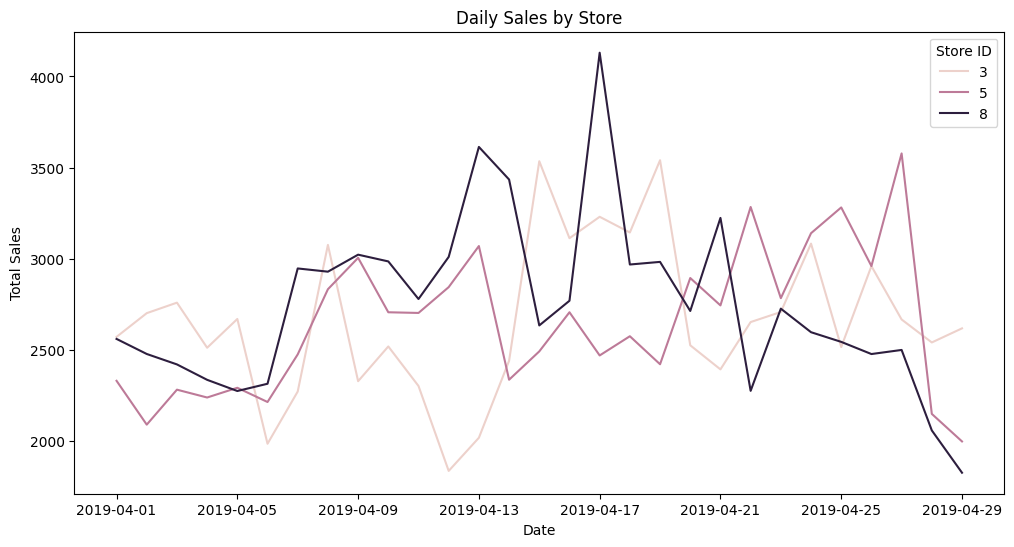

In [13]:
# transaction_date to datetime format
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'], errors='coerce')

sales['day'] = sales['transaction_date'].dt.date

daily_sales = sales.groupby(['sales_outlet_id', 'day'])['line_item_amount'].sum().reset_index()
daily_sales.columns = ['sales_outlet_id', 'transaction_date', 'total_sales']

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='transaction_date', y='total_sales', hue='sales_outlet_id')
plt.title('Daily Sales by Store')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Store ID')
plt.show()

**What Number of the transactions for each store on daily basis.**

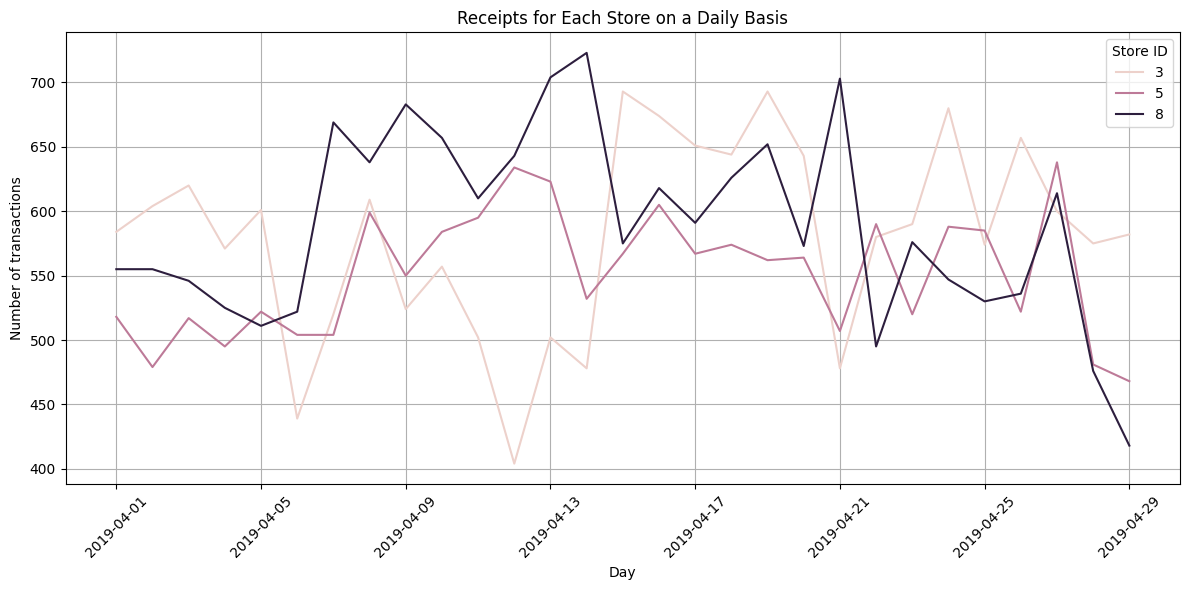

In [14]:
transactions_by_store_day = sales.groupby(['sales_outlet_id', 'day']).size().reset_index(name='transactions')

plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_store_day, x='day', y='transactions', hue='sales_outlet_id')
plt.title('Receipts for Each Store on a Daily Basis')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.legend(title='Store ID')
plt.grid(True)
plt.tight_layout()
plt.show()

**What are the peak hours for each store.**

    sales_outlet_id  hour  transactions
3                 3    10          1711
22                5    10          2053
35                8     8          2318


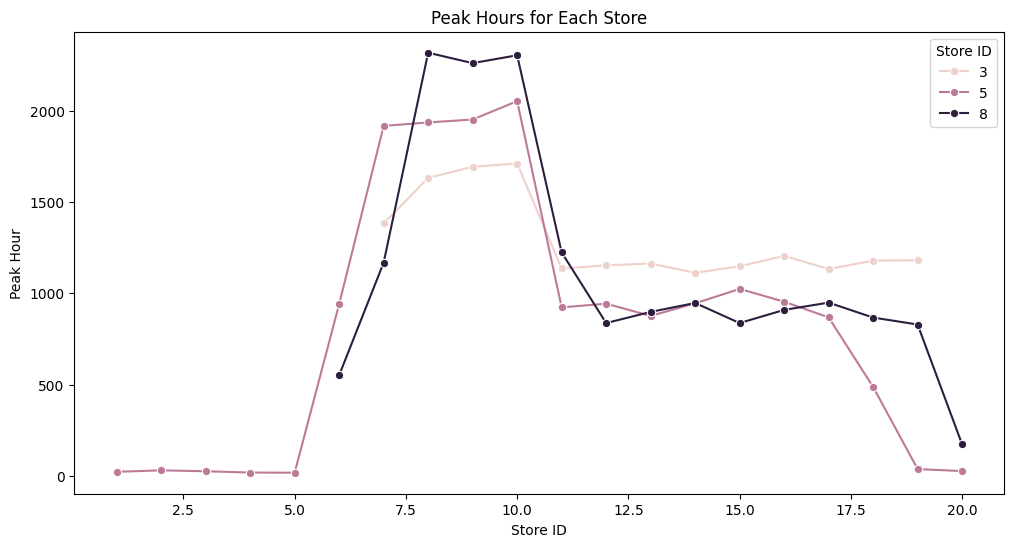

In [16]:
sales['transaction_time'] = pd.to_datetime(sales['transaction_time'])
sales['hour'] = sales['transaction_time'].dt.hour

transactions_by_hour = sales.groupby(['sales_outlet_id', 'hour']).size().reset_index(name='transactions')
# print(transactions_by_hour)

# Peak hour for each store
peak_hours = transactions_by_hour.loc[transactions_by_hour.groupby('sales_outlet_id')['transactions'].idxmax()]
print(peak_hours)

plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_hour, x='hour', y='transactions', hue='sales_outlet_id', marker='o')
plt.title('Peak Hours for Each Store')
plt.xlabel('Store ID')
plt.ylabel('Peak Hour')
plt.xticks(rotation=0)
plt.legend(title='Store ID')
plt.show()

Insights
*  Morning Peak: Sales peak between 8 to 10 AM as customers seek stimulating drinks to start their day.
*  Steady Sales: After 10 AM, sales become more evenly distributed from 11 AM to 7 PM.
*  Sales Disparity: Sales during peak hours are twice as high as during regular hours. This insight can be used to optimize employee scheduling and task allocation throughout the workday.

**What the most sold product, the quantity sold, the store with the highest sales for that product, and details about the product itself.**


In [17]:
most_selling_item = sales.groupby('product_id')['quantity'].sum().reset_index()

# Identify the most selling item
most_selling_item = most_selling_item.loc[most_selling_item['quantity'].idxmax()]

# The most selling item and its quantity sold
print("Most Selling Item:")
print("Product ID:", most_selling_item['product_id'])
print("Product Name:", most_selling_item['product_id'])

print("Quantity Sold:", most_selling_item['quantity'])

# Get the store ID where the most selling item was sold
most_selling_item_by_store = sales.groupby(['sales_outlet_id', 'product_id'])['quantity'].sum().reset_index()
most_selling_item = most_selling_item_by_store.loc[most_selling_item_by_store['quantity'].idxmax()]
most_selling_store = most_selling_item['sales_outlet_id']

print("Store ID:", most_selling_store)

# Fetch the product details for the most selling item
most_selling_product_details = df['product'][df['product']['product_id'] == most_selling_item['product_id']]
print("\nMost Selling Product Details:")
print("Product ID:", most_selling_product_details['product_id'].values[0])
print("Product Group:", most_selling_product_details['product_group'].values[0])
print("Product Category:", most_selling_product_details['product_category'].values[0])
print("Product Type:", most_selling_product_details['product_type'].values[0])
print("Unit of Measure:", most_selling_product_details['unit_of_measure'].values[0])
print("Current Wholesale Price:", most_selling_product_details['current_wholesale_price'].values[0])
print("Current Retail Price:", most_selling_product_details['current_retail_price'].values[0])
print("Tax Exempt:", most_selling_product_details['tax_exempt_yn'].values[0])
print("Promo:", most_selling_product_details['promo_yn'].values[0])
print("New Product:", most_selling_product_details['new_product_yn'].values[0])

Most Selling Item:
Product ID: 50
Product Name: 50
Quantity Sold: 1558
Store ID: 8

Most Selling Product Details:
Product ID: 87
Product Group: Beverages
Product Category: Coffee
Product Type: Barista Espresso
Unit of Measure: 1.5 oz
Current Wholesale Price: 0.6
Current Retail Price: $3.00 
Tax Exempt: Y
Promo: N
New Product: N


**what the best performing store for the month**


In [18]:
sales['transaction_month'] = sales['transaction_date'].dt.to_period('M')
monthly_sales_by_store = sales.groupby(['sales_outlet_id', 'transaction_month'])['line_item_amount'].sum().reset_index()

# Find the best performing store for each month
best_performing_store_by_month = monthly_sales_by_store.loc[monthly_sales_by_store.groupby('transaction_month')['line_item_amount'].idxmax()]

print("Best Performing Store by Month:")
print(best_performing_store_by_month)

Best Performing Store by Month:
   sales_outlet_id transaction_month  line_item_amount
2                8           2019-04          79528.25


??????????/Which the staff member with the largest number of transactions

In [23]:
transactions_by_staff = sales.groupby('staff_id').size().reset_index(name='transaction_count')

# Find the staff member with the largest number of transactions
most_transactions_staff = transactions_by_staff.loc[transactions_by_staff['transaction_count'].idxmax()]

print("Staff with the Largest Number of Transactions:")
print("Staff ID:", most_transactions_staff['staff_id'])
print("Transaction Count:", most_transactions_staff['transaction_count'])

Staff with the Largest Number of Transactions:
Staff ID: 12
Transaction Count: 5930


**How do promo items perform compared to non-promo items in terms of sales amount and quantity sold**

Summary Statistics for Promo Items:
       transaction_id  sales_outlet_id    staff_id  customer_id  order  \
count      490.000000       490.000000  490.000000   490.000000  490.0   
mean       821.653061         6.910204   30.742857  2635.318367    1.0   
std        654.907348         1.444296   14.060750  3451.530081    0.0   
min          1.000000         5.000000    6.000000     0.000000    1.0   
25%        296.000000         5.000000   26.000000     0.000000    1.0   
50%        580.500000         8.000000   30.000000     0.000000    1.0   
75%       1357.500000         8.000000   43.000000  5488.500000    1.0   
max       2362.000000         8.000000   45.000000  8493.000000    1.0   

       line_item_id  product_id    quantity  line_item_amount  unit_price  
count    490.000000  490.000000  490.000000        490.000000  490.000000  
mean       2.461224   79.832653    1.332653          3.038571    2.533673  
std        1.479072    7.504638    0.569823          1.443306    0.49

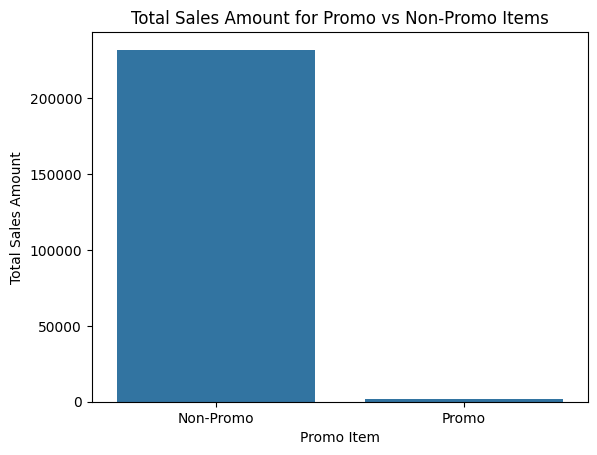

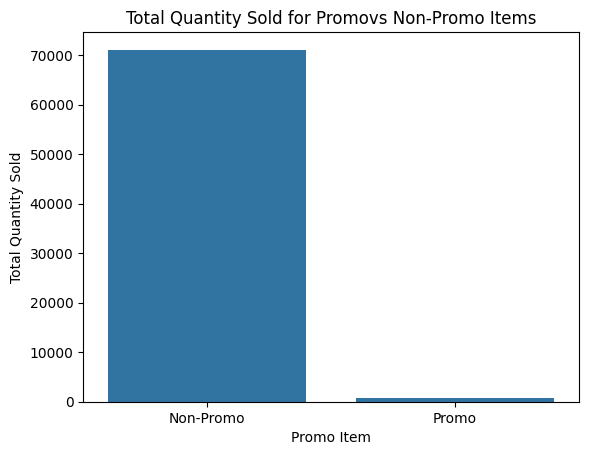

In [30]:
# Convert promo_item_yn to boolean for easier analysis
sales['promo_item_yn'] = sales['promo_item_yn'].map({'Y': True, 'N': False})

promo_sales = sales[sales['promo_item_yn'] == True]
non_promo_sales = sales[sales['promo_item_yn'] == False]

# statistics for promo and non-promo items
promo_summary = promo_sales.describe()
non_promo_summary = non_promo_sales.describe()

print("Summary Statistics for Promo Items:")
print(promo_summary)

print("\nSummary Statistics for Non-Promo Items:")
print(non_promo_summary)

# total sales amount for promo vs non-promo
total_sales = sales.groupby('promo_item_yn')['line_item_amount'].sum().reset_index()
sns.barplot(x='promo_item_yn', y='line_item_amount', data=total_sales)
plt.title('Total Sales Amount for Promo vs Non-Promo Items')
plt.xlabel('Promo Item')
plt.ylabel('Total Sales Amount')
plt.xticks([0, 1], ['Non-Promo', 'Promo'])
plt.show()

# total quantity sold for promo vs non-promo
total_quantity = sales.groupby('promo_item_yn')['quantity'].sum().reset_index()
sns.barplot(x='promo_item_yn', y='quantity', data=total_quantity)
plt.title('Total Quantity Sold for Promovs Non-Promo Items')
plt.xlabel('Promo Item')
plt.ylabel('Total Quantity Sold')
plt.xticks([0, 1], ['Non-Promo', 'Promo'])
plt.show()

Find the customer with the highest total sales amount for each store.

In [31]:
customer_sales = sales.groupby(['sales_outlet_id', 'customer_id'])['line_item_amount'].sum().reset_index()

max_sales_index = customer_sales.groupby('sales_outlet_id')['line_item_amount'].idxmax()

# Get the rows with the maximum sales amount for each store
top_customers = customer_sales.loc[max_sales_index]

print("Top Customers by Sales Amount in Each Store:")
print(top_customers)

Top Customers by Sales Amount in Each Store:
      sales_outlet_id  customer_id  line_item_amount
0                   3            0          38659.14
801                 5            0          36940.60
1747                8            0          43712.98


Insights
*   For all three stores, customer with id 0 made the highest sales.

**Daily sales per transaction per day of month.**

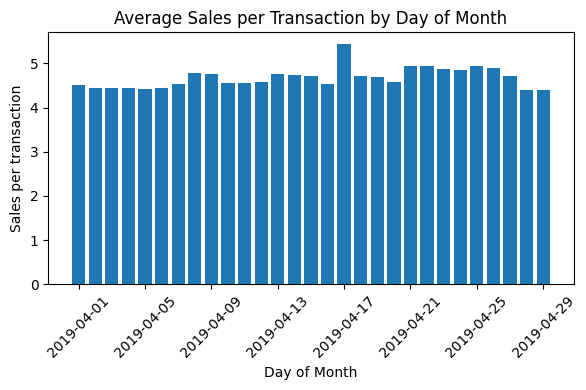

In [32]:
monthly_trend = sales.copy()

# Calculate the average sales per transaction by day of the month
daily_sales_per_transac_by_month = monthly_trend.groupby('day')['line_item_amount'].mean()

plt.figure(figsize=(6, 4))
plt.bar(daily_sales_per_transac_by_month.index, daily_sales_per_transac_by_month.values)
plt.tick_params('x', rotation=45)
plt.xlabel('Day of Month')
plt.ylabel('Sales per transaction')
plt.title('Average Sales per Transaction by Day of Month')

plt.tight_layout()
plt.show()

Insight
*   Strong Days: The plot highlights a surge in sales per transaction around the 17th day of the month. This pattern indicates that during these mid-month days, customer spending per transaction is higher.

Usage of Insights:

*   Promotion Timing: Focus promotional efforts around 17th day to capitalize on the existing surge in customer spending.

**Daily sales per week.**

8061.181500000001


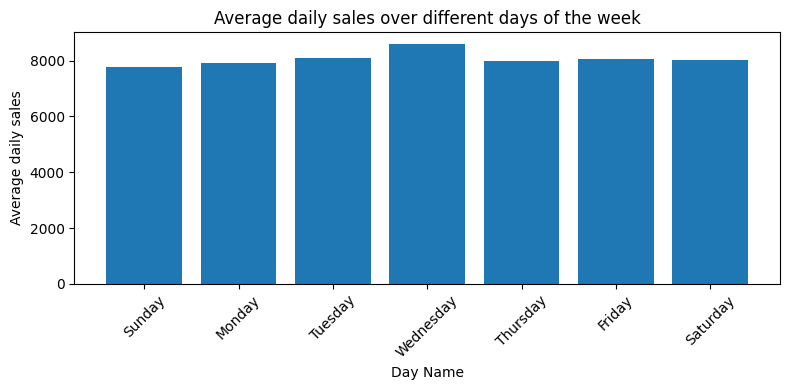

In [35]:
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales['day_name'] = sales['transaction_date'].dt.day_name()

# Calculate total sales per day of the week
total_sales_per_day_of_week = sales.groupby('day_name')['line_item_amount'].sum()

# Reindex to ensure the days are in the correct order
total_sales_per_day_of_week = total_sales_per_day_of_week.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Calculate the count of each day in the dataset
unique_dates = sales.drop_duplicates('transaction_date')
days_of_week_count = unique_dates['day_name'].value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Calculate average daily sales per week
avg_daily_sales_per_week = total_sales_per_day_of_week / days_of_week_count
print(avg_daily_sales_per_week.mean())

fig3, ax0 = plt.subplots(figsize=(8, 4))

ax0.bar(avg_daily_sales_per_week.index, avg_daily_sales_per_week.values)
ax0.set_xlabel('Day Name')
ax0.set_ylabel('Average daily sales')
ax0.set_title('Average daily sales over different days of the week')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Which gender has the highest sales at each store**

**Check if each store has achieved the required goal**